In [11]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

print(torch.cuda.is_available())

True


In [12]:
# create known paramters
# creating data
weight = 0.7
bias = 0.3

# data
start = 0
end = 1
step = 0.02
# x is capital because it's a matrix or tensor
X = torch.arange(start, end, step).unsqueeze(dim=1)  # adds an extra dimension
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [13]:
# Create a train/test split
# 80 percent for the train split
train_split = int(0.8 * len(X))
# first 40 examples for the training examples
X_train, y_train = X[:train_split], y[:train_split]
# last 10 examples for the testing examples
X_test, y_test = X[train_split:], y[train_split:]

X_train, y_train = X_train.to(device="cuda"), y_train.to(device="cuda")
X_test, y_test = X_test.to(device="cuda"), y_test.to(device="cuda")

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [14]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(
            in_features=1, out_features=10
        )  # Change in_features to 1
        self.layer_2 = nn.Linear(in_features=10, out_features=40)
        self.layer_3 = nn.Linear(in_features=40, out_features=10)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [15]:
model_1 = CircleModelV1().to(device="cuda")
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.8321],
                      [-0.8196],
                      [ 0.6730],
                      [-0.8351],
                      [-0.5849],
                      [-0.8847],
                      [-0.5796],
                      [ 0.9419],
                      [ 0.5566],
                      [-0.3973]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6293, -0.5479, -0.8057, -0.8502,  0.8267, -0.1019,  0.0563,  0.7802,
                      -0.0946,  0.3353], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0983,  0.2223, -0.2431, -0.0055,  0.0044, -0.1990, -0.0385,  0.1942,
                       -0.1578, -0.0012],
                      [-0.2262,  0.0779,  0.2105,  0.0412,  0.1396, -0.1145, -0.0856, -0.3069,
                       -0.1866, -0.2504],
                      [-0.2506, -0.0025,  0.0153,  0.1535,  0.1239,  0.2695,  0.2223,  0.3098,
                        0.2690, -

In [16]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [17]:
epochs = 2000


for epoch in range(epochs):
    model_1.train()
    
    y_pred = model_1(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)
    
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test).squeeze()
        test_loss = loss_fn(test_pred, y_test)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")
    
    

Epoch: 0 | Train Loss: 0.60836 | Test Loss: 0.95899


d:\pytorch-course-revise\.venv\Lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([40, 1])) that is different to the input size (torch.Size([40, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
d:\pytorch-course-revise\.venv\Lib\site-packages\torch\nn\modules\loss.py:128: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 100 | Train Loss: 0.08133 | Test Loss: 0.19087
Epoch: 200 | Train Loss: 0.05023 | Test Loss: 0.11448
Epoch: 300 | Train Loss: 0.02299 | Test Loss: 0.04813
Epoch: 400 | Train Loss: 0.01214 | Test Loss: 0.01740
Epoch: 500 | Train Loss: 0.01104 | Test Loss: 0.00937
Epoch: 600 | Train Loss: 0.01124 | Test Loss: 0.00838
Epoch: 700 | Train Loss: 0.01140 | Test Loss: 0.00754
Epoch: 800 | Train Loss: 0.01165 | Test Loss: 0.00660
Epoch: 900 | Train Loss: 0.01115 | Test Loss: 0.00678
Epoch: 1000 | Train Loss: 0.01170 | Test Loss: 0.00550
Epoch: 1100 | Train Loss: 0.01210 | Test Loss: 0.00431
Epoch: 1200 | Train Loss: 0.01220 | Test Loss: 0.00361
Epoch: 1300 | Train Loss: 0.01196 | Test Loss: 0.00326
Epoch: 1400 | Train Loss: 0.01020 | Test Loss: 0.00347
Epoch: 1500 | Train Loss: 0.01022 | Test Loss: 0.00278
Epoch: 1600 | Train Loss: 0.01041 | Test Loss: 0.00233
Epoch: 1700 | Train Loss: 0.01016 | Test Loss: 0.00227
Epoch: 1800 | Train Loss: 0.01008 | Test Loss: 0.00229
Epoch: 1900 | Train

In [18]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(
        train_data.cpu().numpy(), train_labels, c="b", s=4, label="Training data "
    )

    # plot testing data in green
    plt.scatter(test_data.cpu().numpy(), test_labels, c="g", s=4, label="Testing data")

    # Are there predictions ?
    if predictions is not None:
        # plot the predictions
        plt.scatter(
            test_data.cpu().numpy(), predictions, c="r", s=4, label="Predictions"
        )

    # show the legend
    plt.legend(prop={"size": 14})

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

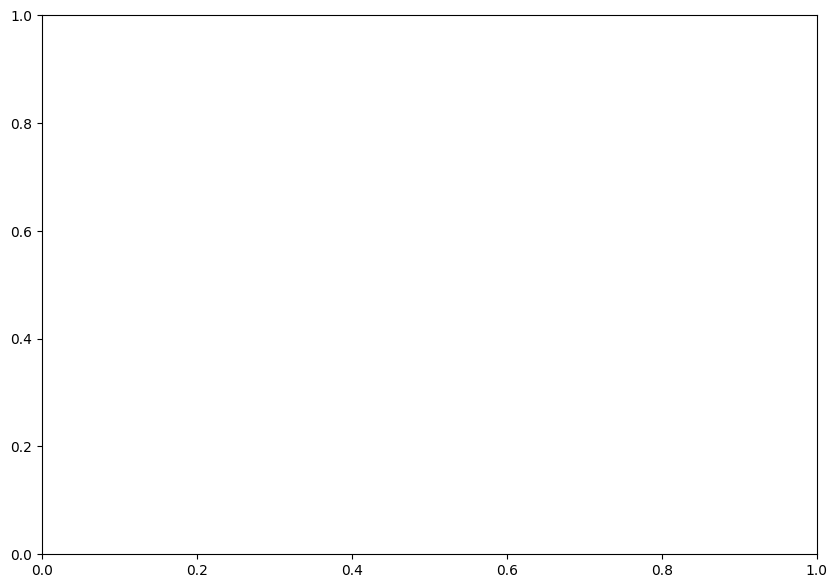

In [ ]:
with torch.inference_mode():
    
    plot_predictions(predictions=y_pred.detach().cpu().numpy())